In [1]:
from transduction import FST, EPSILON, Precover, display_table
from transduction import FSA

In [2]:
def cover(fst, target):
    Q, R = Precover(fst, target).decomposition
    return set(R.language(np.inf)), set(Q.language(np.inf))

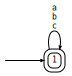

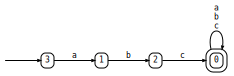

In [3]:
class simple_machine:

    @staticmethod
    def build():
        t = FST()
        t.add_start(1)
        t.add_stop(1)
    
        t.add_arc(1, 'a', 'a', 1)
        t.add_arc(1, 'b', 'b', 1)
        t.add_arc(1, 'c', 'c', 1)
    
        return t

    @classmethod
    def test(cls):
        t = cls.build()
        display(t)
        P = Precover(t, "abc")
        display(P)
        Q, R = P.decomposition
        assert Q.equal({'abc'}) and R.equal(set())

simple_machine.test()

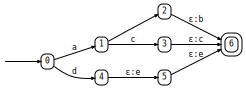

In [11]:
class acc_machine:
    
    @staticmethod
    def build():
        t = FST()
        start, A, B, C, D, E, end = range(7)
        t.add_start(start)
        t.add_stop(end)
    
        t.add_arc(start, 'a', 'a', A)
        t.add_arc(A, EPSILON, EPSILON, B)
        t.add_arc(A, 'c', 'c', C)
        t.add_arc(B, EPSILON, 'b', end)
        t.add_arc(C, EPSILON, 'c', end)
    
        t.add_arc(start, 'd', 'd', D)
        t.add_arc(D, EPSILON, 'e', E)
        t.add_arc(E, EPSILON, 'e', end)
    
        return t

    @classmethod
    def test(cls):
        t = cls.build()
        display(t)
        Q, R = Precover(t, 'acc').decomposition
        assert Q.equal(set()) and R.equal({'ac'})

acc_machine.test()

In [12]:
class anbn_ambiguous:

    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        for final_state in ["2ea", "4ec", "7ab"]:
            fst.add_F(final_state)
    
        # Transitions
        fst.add_arc("START", "a", EPSILON, "1ae")
        fst.add_arc("1ae", EPSILON, "b", "2ea")
        fst.add_arc("1ae", "a", EPSILON, "3ae")
        fst.add_arc("3ae", EPSILON, "c", "4ec")
    
        fst.add_arc("3ae", EPSILON, "b", "dummy")
        fst.add_arc("dummy", "a", "b", "5eb")
        fst.add_arc("5eb", EPSILON, EPSILON, "6eb")
        fst.add_arc("6eb", EPSILON, "b", "7ab")
        fst.add_arc("7ab", "a", "b", "7ab")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        Q, R = Precover(t, 'b').decomposition
        assert Q.equal({'aaa'}) and R.equal({'a'})
        display_table([[Q, R]], headings=['Q', 'R'])
    
anbn_ambiguous.test()

In [13]:
class backticks_to_quote:

    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        fst.add_F("START")
    
        for c in "ab":
            fst.add_arc("START", c, EPSILON, f"CHAR_{c}")
            fst.add_arc(f"CHAR_{c}", EPSILON, c, "START")
    
        fst.add_arc("START", "`", EPSILON, "Quote")
        fst.add_arc("Quote", EPSILON, "`", "1_Quote")
        fst.add_F("1_Quote")
    
        fst.add_arc("1_Quote", "a", EPSILON, "CHAR_a")
        fst.add_arc("1_Quote", "b", EPSILON, "CHAR_b")
    
        fst.add_arc("Quote", "`", "\"", "2_quotes")
        fst.add_arc("2_quotes", EPSILON, EPSILON, "START")
        fst.add_F("2_quotes")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        remainder, quotient = cover(t, '`')
        assert "`" in remainder
        assert "`a" in quotient
        assert "`b" in quotient
        assert len(remainder) == 1
        assert len(quotient) == 2
    
        remainder, quotient = cover(t, 'a')
        assert "a" in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, 'b')
        assert "b" in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1

backticks_to_quote.test()

In [14]:
class anbn_branching:

    @staticmethod
    def build():
        fst = FST()
        fst.add_start("START")
        for final in ["2", "3_br", "4"]:
            fst.add_stop(final)
    
        fst.add_arc("START", EPSILON, EPSILON, "1_br")
        fst.add_arc("START", "a", EPSILON, "1")
        fst.add_arc("1_br", "a", EPSILON, "2_br")
        fst.add_arc("1", EPSILON, "b", "2")
        fst.add_arc("2", "a", "b", "3")
        fst.add_arc("3", "a", "b", "4")
        fst.add_arc("4", "a", "b", "4")
        fst.add_arc("2_br", "a", "c", "3_br")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        Q, R = Precover(t, "b").decomposition
        assert Q.equal({'aaa'}) and R.equal({"a"})

anbn_branching.test()

In [15]:
class anbn_3a_to_c:

    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        for final in ["2ea", "4aa", "Ex_c", "7ab"]:
            fst.add_stop(final)
    
        fst.add_arc("START", "a", EPSILON, "1ae")
        fst.add_arc("1ae", EPSILON, "b", "2ea")
        fst.add_arc("1ae", "a", EPSILON, "3ae")
        fst.add_arc("3ae", EPSILON, "b", "4ae")
        fst.add_arc("4ae", EPSILON, "b", "4aa")
    
        fst.add_arc("3ae", "a", EPSILON, "Ex")
        fst.add_arc("Ex", EPSILON, "c", "Ex_c")
        fst.add_arc("Ex", "a", "b", "5eb")
        fst.add_arc("5eb", EPSILON, "b", "6eb")
        fst.add_arc("6eb", EPSILON, "b", "7ab")
        fst.add_arc("7ab", "a", "b", "7ab")
    
        return fst

    @classmethod
    def test(cls):    
        t = cls.build()
        #display(t)
        quotient, remainder = Precover(t, "b").decomposition
        assert remainder.equal({"a", "aa"})
        assert quotient.equal({"aaaa"})

anbn_3a_to_c.test()

In [16]:
class three_backticks_to_quote:

    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        fst.add_stop("START")
    
        # Transitions for a and b
        for c in "ab":
            fst.add_arc("START", c, EPSILON, f"CHAR_{c}")
            fst.add_arc(f"CHAR_{c}", EPSILON, c, "START")
            fst.add_arc("Only_1_Quote", c, EPSILON, f"CHAR_{c}")
            fst.add_arc("Only_2_quotes", c, EPSILON, f"CHAR_{c}")
    
        # Handle backticks
        fst.add_arc("START", "`", EPSILON, "Quote")
        fst.add_arc("Quote", EPSILON, "`", "Only_1_Quote")
        fst.add_stop("Only_1_Quote")
    
        # Two ticks (not yet a quote)
        fst.add_arc("Quote", "`", EPSILON, "Quote2")
        fst.add_arc("Quote2", EPSILON, "`", "Only_2_quotes_temp")
        fst.add_arc("Only_2_quotes_temp", EPSILON, "`", "Only_2_quotes")
        fst.add_stop("Only_2_quotes")
    
        # Three ticks = quote
        fst.add_arc("Quote2", "`", "\"", "3_quotes")
        fst.add_arc("3_quotes", EPSILON, EPSILON, "START")
        fst.add_stop("3_quotes")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        remainder, quotient = cover(t, '`')
        assert "`" in remainder
        assert "``" in remainder
        assert "`a" in quotient
        assert "`b" in quotient
        assert "``a" in quotient
        assert "``b" in quotient
        assert len(remainder) == 2
        assert len(quotient) == 4
    
        remainder, quotient = cover(t, '``')
        assert "``" in remainder
        assert "``a" in quotient
        assert "``b" in quotient
        assert len(remainder) == 1
        assert len(quotient) == 2
    
        remainder, quotient = cover(t, 'a')
        assert "a" in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, 'b')
        assert "b" in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, '"')
        assert '```' in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
three_backticks_to_quote.test()

In [17]:
class backticks_to_quote_combine_anbn:
    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        for name in ["START", "1_Quote", "2_quotes", "2ea", "4ec", "7ab"]:
            fst.add_stop(name)
    
        # Backtick handling
        fst.add_arc("START", "`", EPSILON, "Quote")
        fst.add_arc("Quote", EPSILON, "`", "1_Quote")
        fst.add_arc("Quote", "`", "\"", "2_quotes")
        fst.add_arc("2_quotes", EPSILON, EPSILON, "START")
        fst.add_arc("1_Quote", EPSILON, EPSILON, "START2")
        fst.add_arc("2_quotes", EPSILON, EPSILON, "START2")
        fst.add_arc("START", EPSILON, EPSILON, "START2")
    
        # ANBN logic
        fst.add_arc("START2", "a", EPSILON, "1ae")
        fst.add_arc("1ae", EPSILON, "b", "2ea")
        fst.add_arc("2ea", "`", EPSILON, "Quote")
    
        fst.add_arc("1ae", "a", EPSILON, "3ae")
        fst.add_arc("3ae", EPSILON, "c", "4ec")
        fst.add_arc("4ec", "`", EPSILON, "Quote")
    
        fst.add_arc("3ae", "a", "b", "5eb")
        fst.add_arc("5eb", EPSILON, "b", "6eb")
        fst.add_arc("6eb", EPSILON, "b", "7ab")
        fst.add_arc("7ab", "a", "b", "7ab")
        fst.add_arc("7ab", "`", EPSILON, "Quote")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        remainder, quotient = cover(t, '`')
        assert "`" in remainder
        assert "`a" in quotient
        assert len(remainder) == 1
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, '"')
        assert '``' in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, 'b')
        assert 'a' in remainder
        assert len(remainder) == 1
        assert 'aaa' in quotient
        assert 'a`' in quotient
        assert len(quotient) == 2
    
        remainder, quotient = cover(t, '"b')
        assert '``a' in remainder
        assert len(remainder) == 1
        assert '``a`' in quotient
        assert '``aaa' in quotient
        assert len(quotient) == 2

backticks_to_quote_combine_anbn.test()

In [18]:
def build_anbn_example_paper():
    fst = FST()

    states = {name: fst.add_state() for name in [
        "START", "1ae", "2ea", "3ae", "4ec", "5eb", "6eb", "7ab"
    ]}
    fst.set_start(states["START"])
    for final in ["2ea", "4ec", "7ab"]:
        fst.set_final(states[final])

    fst.add_arc(states["START"], Arc(ord("a"), 0, wt, states["1ae"]))
    fst.add_arc(states["1ae"], Arc(0, ord("b"), wt, states["2ea"]))
    fst.add_arc(states["1ae"], Arc(ord("a"), 0, wt, states["3ae"]))
    fst.add_arc(states["3ae"], Arc(0, ord("c"), wt, states["4ec"]))
    fst.add_arc(states["3ae"], Arc(ord("a"), ord("b"), wt, states["5eb"]))
    fst.add_arc(states["5eb"], Arc(0, ord("b"), wt, states["6eb"]))
    fst.add_arc(states["6eb"], Arc(0, ord("b"), wt, states["7ab"]))
    fst.add_arc(states["7ab"], Arc(ord("a"), ord("b"), wt, states["7ab"]))

    return fst

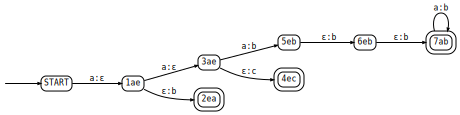

In [19]:
def build_anbn_example_paper():        
    fst = FST()
    
    fst.add_start("START")
    for final in ["2ea", "4ec", "7ab"]:
        fst.add_stop(final)

    fst.add_arc("START", "a", EPSILON, "1ae")
    fst.add_arc("1ae", EPSILON, "b", "2ea")
    fst.add_arc("1ae", "a", EPSILON, "3ae")
    fst.add_arc("3ae", EPSILON, "c", "4ec")
    fst.add_arc("3ae", "a", "b", "5eb")
    fst.add_arc("5eb", EPSILON, "b", "6eb")
    fst.add_arc("6eb", EPSILON, "b", "7ab")
    fst.add_arc("7ab", "a", "b", "7ab")

    return fst
build_anbn_example_paper()

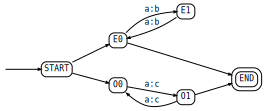

In [20]:
def build_parity_machine():
    fst = FST()

    fst.add_start("START")
    fst.add_stop("END")

    # Even branch
    fst.add_arc("START", EPSILON, EPSILON, "E0")
    fst.add_arc("E0", "a", "b", "E1")
    fst.add_arc("E1", "a", "b", "E0")
    fst.add_arc("E0", EPSILON, EPSILON, "END")

    # Odd branch
    fst.add_arc("START", EPSILON, EPSILON, "O0")
    fst.add_arc("O0", "a", "c", "O1")
    fst.add_arc("O1", "a", "c", "O0")
    fst.add_arc("O1", EPSILON, EPSILON, "END")

    return fst

build_parity_machine()

In [21]:
class backticks_to_quote_example_paper:

    @staticmethod
    def build():
        fst = FST()
        fst.add_start("START")
        fst.add_stop("START")
    
        # a:b transition
        fst.add_arc("START", "a", EPSILON, "CHAR_a")
        fst.add_arc("CHAR_a", EPSILON, "b", "START")
    
        # backtick logic
        fst.add_arc("START", "`", EPSILON, "Quote")
        fst.add_arc("Quote", EPSILON, "`", "1_Quote")
        fst.add_stop("1_Quote")
    
        fst.add_arc("Quote", "`", "\"", "2_quotes")
        fst.add_arc("2_quotes", EPSILON, EPSILON, "START")
        fst.add_stop("2_quotes")
    
        # Allow transitions from single backtick state
        fst.add_arc("1_Quote", "a", EPSILON, "CHAR_a")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        remainder, quotient = cover(t, '`')
        assert "`" in remainder
        assert "`a" in quotient
        assert len(remainder) == 1
        assert len(quotient) == 1
    
        remainder, quotient = cover(t, 'b')
        assert "a" in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
backticks_to_quote_example_paper.test()

In [22]:
class quote_to_backticks:
    @staticmethod
    def build():
        fst = FST()
    
        fst.add_start("START")
        for final in ["START", "Quote No Space", "Quote Space"]:
            fst.add_stop(final)
    
        # b and space mapping
        for c in ["b", " "]:
            dst = f"CHAR_{'space' if c == ' ' else c}"
            fst.add_arc("START", c, EPSILON, dst)
            fst.add_arc(dst, EPSILON, c, "START")
    
        # "
        fst.add_arc("START", '"', EPSILON, "Quote")
        fst.add_arc("Quote", EPSILON, '"', "Quote No Space")
        fst.add_arc("Quote No Space", "b", EPSILON, "CHAR_b")
        fst.add_arc("Quote No Space", '"', '"', "START")
    
        # " + space → ``
        fst.add_arc("Quote", " ", "`", "Quote Space")
        fst.add_arc("Quote Space", EPSILON, "`", "Quote Space End")
        fst.add_arc("Quote Space End", EPSILON, EPSILON, "START")
    
        return fst

    @classmethod
    def test(cls):
        t = cls.build()
        remainder, quotient = cover(t, '"')
        assert '"' in remainder
        assert '"b' in quotient
        assert '""' in quotient
        assert len(remainder) == 1
        assert len(quotient) == 2
    
        remainder, quotient = cover(t, '`')
        assert '" ' in quotient
        assert len(remainder) == 0
        assert len(quotient) == 1
    
quote_to_backticks.test()

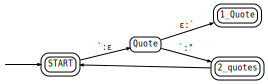

In [23]:
def build_backticks_quote_no_additional_symbols():
    fst = FST()

    fst.add_start("START")
    fst.add_stop("START")
    fst.add_stop("1_Quote")
    fst.add_stop("2_quotes")

    # ` -> `
    fst.add_arc("START", "`", EPSILON, "Quote")
    fst.add_arc("Quote", EPSILON, "`", "1_Quote")

    # `` -> "
    fst.add_arc("Quote", "`", "\"", "2_quotes")
    fst.add_arc("2_quotes", EPSILON, EPSILON, "START")

    return fst
build_backticks_quote_no_additional_symbols()